In [87]:
import pandas as pd # Dataframe
import numpy as np # maths

################ Machine Learning #######################
from sklearn import preprocessing # Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


################ Data visualization #######################
import matplotlib.pyplot as plt # Plot 
plt.rc("font", size=14)
import seaborn as sns # Plot advanced version of matplotlib
import plotly
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import pydot

In [2]:
phone=pd.read_csv(r"C:\Users\BHAGYASHREE\Desktop\python\machine learning\MLR\best-selling-mobile-phones.csv")
phone

,manufacturer,model,form,smartphone,year,units_sold_m
0,Nokia,1100,Bar,No,2003,250.0
1,Nokia,1110,Bar,No,2005,247.5
2,Apple,iPhone 6 and iPhone 6 Plus,Touchscreen,Yes,2014,224.0
3,Nokia,"105 (2013), 105 (2015)",Bar,No,2013,200.0
4,Apple,iPhone 6S and iPhone 6S Plus,Touchscreen,Yes,2015,174.1
...,...,...,...,...,...,...
106,LG,G2,Touchscreen,Yes,2013,3.0
107,LeTV,LeEco Le 1s,Touchscreen,Yes,2016,3.0
108,Google,Pixel and Pixel XL,Touchscreen,Yes,2016,2.1
109,Palm,Centro,Keyboard bar,Yes,2007,2.0


In [3]:
phone.isnull().sum()

manufacturer    0
model           0
form            0
smartphone      0
year            0
units_sold_m    0
dtype: int64

In [5]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  111 non-null    object 
 1   model         111 non-null    object 
 2   form          111 non-null    object 
 3   smartphone    111 non-null    object 
 4   year          111 non-null    int64  
 5   units_sold_m  111 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 5.3+ KB


# Data Preprocessing

In [13]:
phone['smartphone'].value_counts()

Yes    76
No     35
Name: smartphone, dtype: int64

* 76 phones are smart phones and 35 are not smart phones 

* convert data from categorical to numeric 

In [18]:
from sklearn.preprocessing import LabelEncoder
phone.smartphone=(LabelEncoder().fit_transform(phone.smartphone))  # F= 0 & M= 1

In [20]:
phone.head()

,manufacturer,model,form,smartphone,year,units_sold_m
0,Nokia,1100,Bar,0,2003,250.0
1,Nokia,1110,Bar,0,2005,247.5
2,Apple,iPhone 6 and iPhone 6 Plus,Touchscreen,1,2014,224.0
3,Nokia,"105 (2013), 105 (2015)",Bar,0,2013,200.0
4,Apple,iPhone 6S and iPhone 6S Plus,Touchscreen,1,2015,174.1


# Find outliers in data

<AxesSubplot:ylabel='year'>

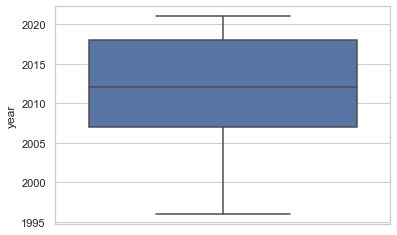

In [36]:
sns.boxplot(y='units_sold_m
            ',data=phone)

In [31]:
q1=phone['units_sold_m'].quantile(0.25)
q3=phone['units_sold_m'].quantile(0.75)
iqr=q3-q1
upper_limit=q3+1.5*(iqr)
upper_limit

135.0

In [32]:
phone['units_sold_m']=np.where(phone['units_sold_m'] > upper_limit,upper_limit,phone['units_sold_m']) 

# Outliers Removed

<AxesSubplot:ylabel='units_sold_m'>

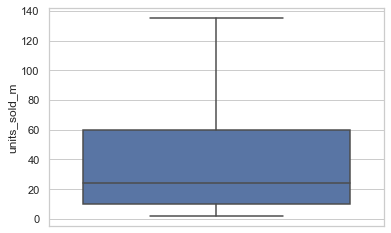

In [33]:
sns.boxplot(y='units_sold_m',data=phone)

Text(0, 0.5, 'Frequency')

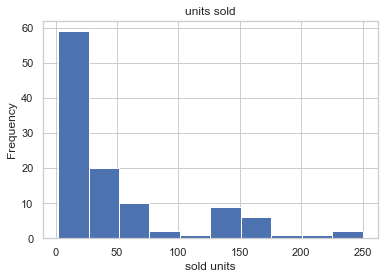

In [27]:
phone.units_sold_m.hist()
plt.title('units sold')
plt.xlabel('sold units')
plt.ylabel('Frequency')

# Breaking data in two parts 
* Quantitative and qualitative 

In [44]:
Quantitative_Variable = phone[phone.select_dtypes(include=[np.number]).columns.tolist()]
Quantitative_Variable.head(3)

,smartphone,year,units_sold_m
0,0,2003,135.0
1,0,2005,135.0
2,1,2014,135.0


In [55]:
Qualitative_Variable = phone[phone.select_dtypes(include=['object']).columns.tolist()]
Qualitative_Variable.head(3)

,manufacturer,model,form
0,Nokia,1100,Bar
1,Nokia,1110,Bar
2,Apple,iPhone 6 and iPhone 6 Plus,Touchscreen


# Combine the data of numeric and objects 

In [59]:
combined = pd.concat([Qualitative_Variable, Quantitative_Variable],axis=1)
combined.head()

,manufacturer,model,form,smartphone,year,units_sold_m
0,7,1,0,0,2003,135.0
1,7,2,0,0,2005,135.0
2,0,104,6,1,2014,135.0
3,7,0,0,0,2013,135.0
4,0,105,6,1,2015,135.0


# Converting Qualitative variable to number 

In [58]:
from sklearn.preprocessing import LabelEncoder
Qualitative_Variable=Qualitative_Variable.apply(LabelEncoder().fit_transform) # label in ascending order
Qualitative_Variable.head()

,manufacturer,model,form
0,7,1,0
1,7,2,0
2,0,104,6
3,7,0,0
4,0,105,6


# Spliting the data in train and test 

* 70 percent data in train and remaining 30 % data in test

In [63]:
X = combined.drop('smartphone', axis = 1)
Y = combined[['smartphone']]
# Split X and y into X_
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.30, random_state=1)

# Model Building 


# Hypothesis 

h0 = There is no linear realtionship between units_sold_m and other variables 

h1 = There no linear realtionship between units_sold_m and other variables

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
output=logreg.fit(X_train, y_train)

C:\Users\BHAGYASHREE\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [65]:
output.intercept_ 

array([-0.00105949])

In [66]:
output.coef_

array([[ 0.07155847,  0.01325505,  0.81383051, -0.00152341, -0.00490695]])

In [67]:
output.n_features_in_

5

# We do not reject h0 

# Prediction on train data set 

In [70]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,manufacturer,model,form,year,units_sold_m,smartphone
32,7,10,0,2003,50.0,0
105,7,76,4,2003,3.0,1
19,0,107,6,2017,124.7,1
110,7,79,5,2009,2.0,1
27,0,101,6,2011,60.0,1


In [71]:
train['Predicted']=output.predict(X_train)
train.head()

,manufacturer,model,form,year,units_sold_m,smartphone,Predicted
32,7,10,0,2003,50.0,0,0
105,7,76,4,2003,3.0,1,1
19,0,107,6,2017,124.7,1,1
110,7,79,5,2009,2.0,1,1
27,0,101,6,2011,60.0,1,1


# model performance matrix 

In [73]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(train['Predicted'], train['smartphone'])
matrix

array([[23,  4],
       [ 4, 46]], dtype=int64)

In [74]:
Accuracy_Train=((23+46)/(23+46+4+4)*100)
print(Accuracy_Train)

89.6103896103896


# accuracy of model  is 89 % 

In [76]:
from sklearn.metrics import classification_report
print(classification_report(train['smartphone'],train['Predicted']))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        27
           1       0.92      0.92      0.92        50

    accuracy                           0.90        77
   macro avg       0.89      0.89      0.89        77
weighted avg       0.90      0.90      0.90        77



50 peopple use smart phone

27 people do not use smart phones 

# Prediction on test data 

In [79]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,manufacturer,model,form,year,units_sold_m,smartphone
90,11,53,6,2017,10.0,1
44,3,80,6,2018,32.0,1
56,11,45,6,2019,23.2,1
82,11,90,1,2003,10.0,0
69,11,47,6,2018,15.2,1


In [80]:
test['Predicted']=output.predict(X_test)
test.head()

,manufacturer,model,form,year,units_sold_m,smartphone,Predicted
90,11,53,6,2017,10.0,1,1
44,3,80,6,2018,32.0,1,1
56,11,45,6,2019,23.2,1,1
82,11,90,1,2003,10.0,0,0
69,11,47,6,2018,15.2,1,1


# Model Performance Metrics on Test data

In [82]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test['Predicted'],test['smartphone'])
print(matrix)

[[ 7  1]
 [ 1 25]]


In [83]:
Accuracy_test=((7+25)/(7+25+1+1)*100)
Accuracy_test

94.11764705882352

In [85]:
from sklearn.metrics import classification_report
print(classification_report(test['smartphone'],test['Predicted']))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.96      0.96      0.96        26

    accuracy                           0.94        34
   macro avg       0.92      0.92      0.92        34
weighted avg       0.94      0.94      0.94        34



26 people use smart phone and 8  people dont prefer smart phones 

In [91]:
features = list(train.columns[1:])
features

['model', 'form', 'year', 'units_sold_m', 'smartphone', 'Predicted']

In [92]:
#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeClassifier()  # by default it use Gini index for split
#Train the model using the training sets
dt.fit(X_train,y_train)

DecisionTreeClassifier()

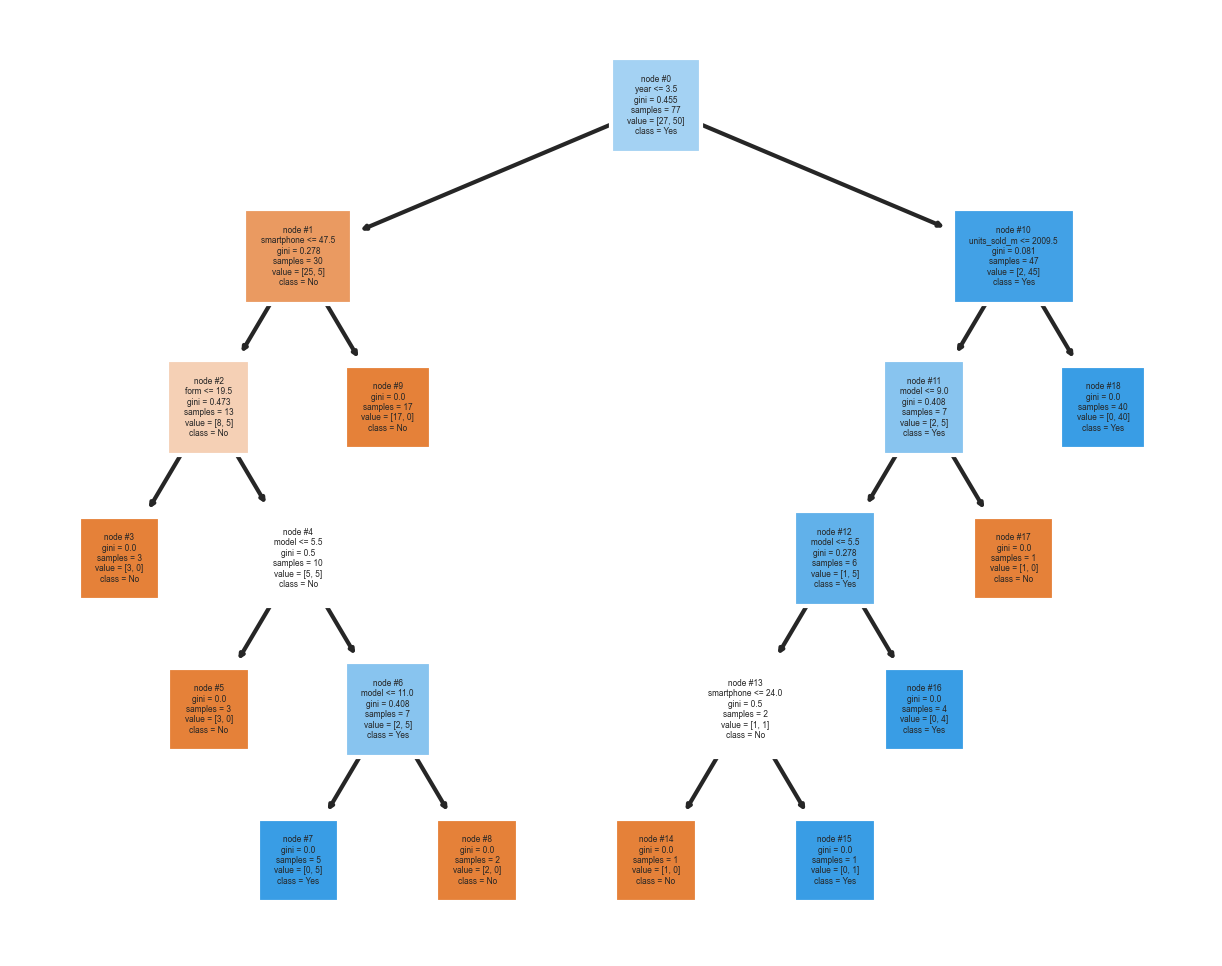

In [93]:
from sklearn import tree
import matplotlib.pyplot as plt

churn=['No', 'Yes']  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt,
               feature_names = features, 
               class_names=churn,
               filled = True, # colour
              node_ids=True, # node number
              fontsize=2); # 
#fig.savefig('imagename.png')